In [1]:
import pandas as pd
import datetime
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

Selecionando arbovirose e os anos

In [2]:
arbo_v = widgets.Combobox(
    placeholder = 'Selecione uma: ',
    options = ["Dengue", "Chikungunya", "Zika"],
    description = 'Arbovirose: ',
    ensure_option = True
)

display(arbo_v)

Combobox(value='', description='Arbovirose: ', ensure_option=True, options=('Dengue', 'Chikungunya', 'Zika'), …

In [10]:
arbo_v.value = str.lower(arbo_v.value)

In [32]:
aux = datetime.date.today()
aux = int(aux.strftime("%Y"))

if arbo_v.value == 'dengue':
    j = 10
else:
    j = 5

anos_aux = []
for i in range (aux-j, aux):
    anos_aux.append(str(i))

In [33]:
ano = widgets.Combobox(
    placeholder = 'Selecione o primeiro ano: ',
    options = anos_aux,
    description = 'Anos: ',
    ensure_option = True
)

display(ano)

Combobox(value='', description='Anos: ', ensure_option=True, options=('2012', '2013', '2014', '2015', '2016', …

In [34]:
anos = []
anos.append(ano.value)

In [35]:
anos_aux = list(filter((anos[0]).__ne__, anos_aux))

ano = widgets.Combobox(
    placeholder = 'Selecione o segundo ano: ',
    options = anos_aux,
    description = 'Anos: ',
    ensure_option = True
)

display(ano)

Combobox(value='', description='Anos: ', ensure_option=True, options=('2012', '2013', '2014', '2015', '2016', …

In [36]:
anos.append(ano.value)

In [37]:
plt.rcParams["figure.figsize"] = (10, 10)

In [38]:
scr = f"../scr/{arbo_v.value}/"

Casos

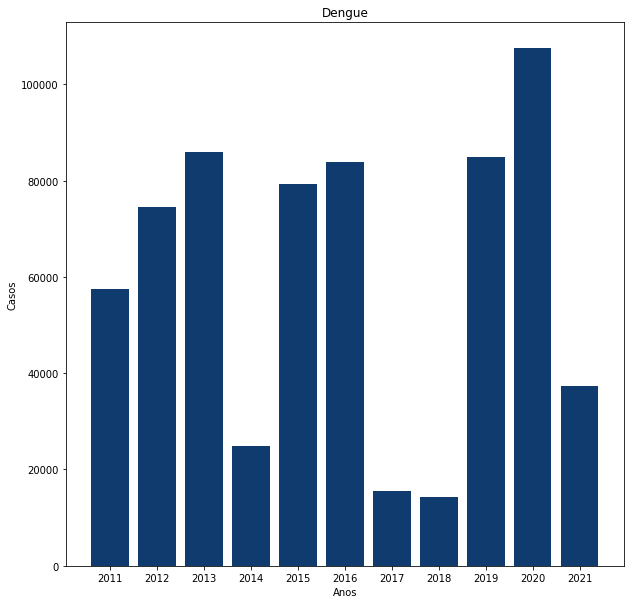

In [39]:
arq = scr + "casos_municipio_10.csv"

df = pd.read_csv(arq, encoding = "utf-8")
df = df.drop(columns=['Unnamed: 0'])

casos = []
ix = []
for i in range (2, df.shape[1]):
    casos.append(df.iloc[:, i].sum())
    ix.append(df.columns[i])

df = pd.DataFrame(casos, index = ix, columns=["Casos"])

plt.bar(df.index, df["Casos"], color="#103b6e")
plt.xlabel("Anos")
plt.ylabel("Casos")
if arbo_v.value == "dengue":
    plt.title("Dengue")
elif arbo_v.value == "chikungunya":
    plt.title("Chikungunya")
else:
    plt.title("Zika Vírus")

Mês

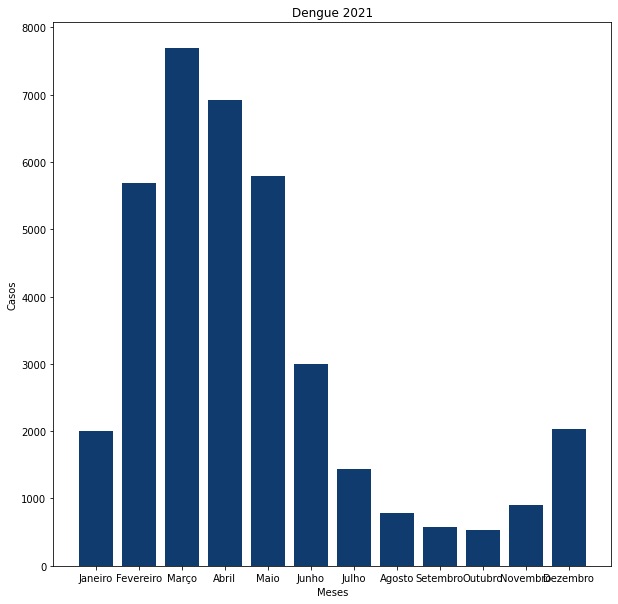

In [40]:
arq = scr + "mes_municipio_" + anos[0] + ".csv"

df = pd.read_csv(arq, encoding = "utf-8")
df = df.drop(columns=['Unnamed: 0'])

Meses = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]
Casos = [ df["Jan"].sum(), df["Fev"].sum(), df["Mar"].sum(), df["Abr"].sum(), df["Mai"].sum(), df["Jun"].sum(), df["Jul"].sum(), df["Ago"].sum(), df["Set"].sum(), df["Out"].sum(), df["Nov"].sum(), df["Dez"].sum() ]

plt.bar(Meses, Casos, color="#103b6e")
plt.xlabel("Meses")
plt.ylabel("Casos")
if arbo_v.value == "dengue":
    plt.title(f"Dengue {anos[0]}")
elif arbo_v.value == "chikungunya":
    plt.title(f"Chikungunya {anos[0]}")
else:
    plt.title(f"Zika Vírus {anos[0]}")

Sexo

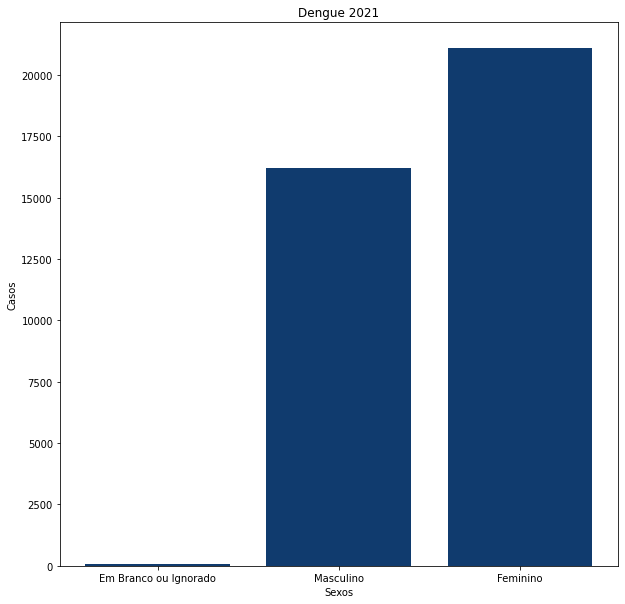

In [41]:
arq = scr + "sexo_municipio_" + anos[0] + ".csv"

df = pd.read_csv(arq, encoding = "utf-8")
df = df.drop(columns=['Unnamed: 0'])

df["Branco e Ignorado"] = df["Em Branco"] + df["Ignorado"]
df = df.drop(columns=['Em Branco'])
df = df.drop(columns=['Ignorado'])

Sexos = ["Em Branco ou Ignorado", "Masculino", "Feminino"]
Casos = [ df["Branco e Ignorado"].sum(), df["Masculino"].sum(), df["Feminino"].sum() ]

plt.bar(Sexos, Casos, color="#103b6e")
plt.xlabel("Sexos")
plt.ylabel("Casos")
if arbo_v.value == "dengue":
    plt.title(f"Dengue {anos[0]}")
elif arbo_v.value == "chikungunya":
    plt.title(f"Chikungunya {anos[0]}")
else:
    plt.title(f"Zika Vírus {anos[0]}")

Faixa Etária

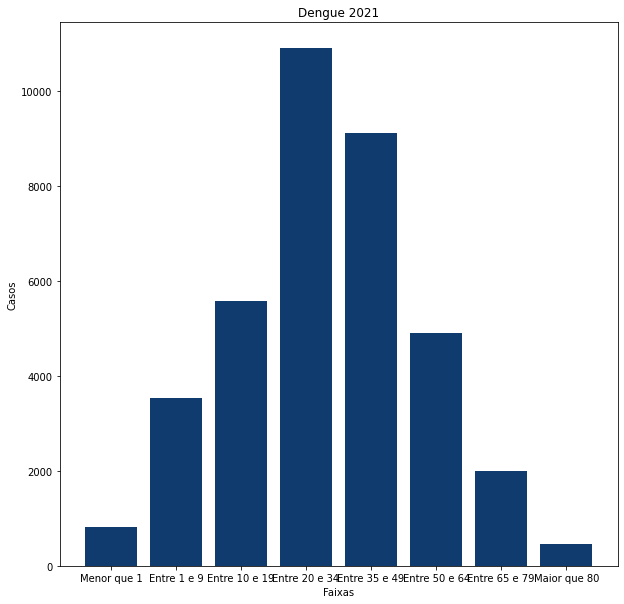

In [42]:
arq = scr + "fx_etaria_municipio_" + anos[0] + ".csv"

df = pd.read_csv(arq, encoding = "utf-8")
df = df.drop(columns=['Unnamed: 0'])

Faixa = ["Menor que 1", "Entre 1 e 9", "Entre 10 e 19", "Entre 20 e 34", "Entre 35 e 49", "Entre 50 e 64", "Entre 65 e 79", "Maior que 80"]
Casos = [ df["<1 Ano"].sum(), df["1-4"].sum() + df["5-9"].sum(), df["10-14"].sum() + df["15-19"].sum(), df["20-34"].sum(), df["35-49"].sum(), df["50-64"].sum(), df["65-79"].sum(), df["80 e+"].sum() ]

plt.bar(Faixa, Casos, color="#103b6e")
plt.xlabel("Faixas")
plt.ylabel("Casos")
if arbo_v.value == "dengue":
    plt.title(f"Dengue {anos[0]}")
elif arbo_v.value == "chikungunya":
    plt.title(f"Chikungunya {anos[0]}")
else:
    plt.title(f"Zika Vírus {anos[0]}")